# Ensemble Classifiers: Expanded Featureset
---
Full featureset (26 features): ['gender', 'age', 'illday', 'eth', 'rash', 'redeyes', 'redplt', 'clnode',
       'redhands', 'peeling', 'pwbc', 'ppolys', 'pbands', 'plymphs', 'pmonos',
       'peos', 'abc', 'anc', 'zhemo', 'pplts', 'pesr', 'pcrp', 'palt', 'pggt',
       'palbumin', 'pua']

### Pre-Training Setup

In [1]:
import sys
sys.path.append('../') # Make parent folder visible
import numpy as np
from scipy.stats import randint

from sklearn import svm, linear_model, neighbors, ensemble, naive_bayes, \
    neural_network, tree, gaussian_process, discriminant_analysis
    
import matplotlib.pyplot as plt

from preprocess import load_data
from model_helpers.models import compute_confusion, explain_confusion, \
    test_model, plot_cv_roc_curves, ScikitModel

In [2]:
x, y, ids = load_data.load_expanded(one_hot=False, fill_mode='mean')

### Test out Candidate Learners

In [3]:
svm_rocs = test_model(ScikitModel(svm.SVC(probability=True), 
                       {
                           'C': np.logspace(-3, 3, 100),
                           'gamma': np.logspace(-3, 3, 100),
                           'kernel': ['linear', 'rbf', 'poly']
                       },
                       random_search=True,
                       n_iter=100,
                       scoring='roc_auc',
                       verbose=True),
                      x, y,
                      allow_indeterminates=True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 10.7min finished


Best params:  {'kernel': 'rbf', 'gamma': 0.0013219411484660286, 'C': 4.9770235643321135}
Best score:  0.983804540375
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.9min finished


Best params:  {'kernel': 'linear', 'gamma': 376.49358067924715, 'C': 0.61359072734131759}
Best score:  0.977896357964
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 10.4min finished


Best params:  {'kernel': 'linear', 'gamma': 0.018738174228603841, 'C': 0.0040370172585965534}
Best score:  0.982350150933
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 13.4min finished


Best params:  {'kernel': 'linear', 'gamma': 1000.0, 'C': 0.057223676593502172}
Best score:  0.978251352746
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.4min finished


Best params:  {'kernel': 'linear', 'gamma': 0.23101297000831603, 'C': 0.014174741629268055}
Best score:  0.981722152265
CV Confusion:  [(109, 7, 5, 147, 9, 12), (116, 8, 6, 157, 1, 1), (108, 7, 5, 146, 9, 13), (119, 8, 6, 160, 0, 0), (101, 7, 5, 146, 16, 13)]
Best CV scores:  [ 0.9838  0.9779  0.9824  0.9783  0.9817]
Avg best scores:  0.980804910857
FC Classified as FC: 553, (93.7288135593 %)
FC Classified as KD: 37, (6.27118644068 %)
KD Classified as FC: 27, (3.44827586207 %)
KD Classified as KD: 756, (96.5517241379 %)
FC left indeterminate: 35
KD left indeterminate: 39


In [4]:
lr_rocs = test_model(ScikitModel(linear_model.LogisticRegression(), 
                       params={
                           'C': np.logspace(-2, 2, 5)
                       },
                       random_search=False,
                       scoring='roc_auc',
                       verbose=True),
           x, y,
           allow_indeterminates=True)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


Best params:  {'C': 0.01}
Best score:  0.983330902425
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params:  {'C': 0.01}
Best score:  0.97744783695


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params:  {'C': 1.0}
Best score:  0.982086419115


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params:  {'C': 0.10000000000000001}
Best score:  0.978113205694


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params:  {'C': 0.10000000000000001}
Best score:  0.981677474335


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


CV Confusion:  [(105, 7, 5, 141, 13, 18), (117, 8, 6, 160, 0, 0), (108, 7, 5, 135, 9, 24), (119, 8, 6, 160, 0, 0), (101, 7, 5, 145, 16, 14)]
Best CV scores:  [ 0.9833  0.9774  0.9821  0.9781  0.9817]
Avg best scores:  0.980531167703
FC Classified as FC: 550, (93.6967632027 %)
FC Classified as KD: 37, (6.30323679727 %)
KD Classified as FC: 27, (3.515625 %)
KD Classified as KD: 741, (96.484375 %)
FC left indeterminate: 38
KD left indeterminate: 56


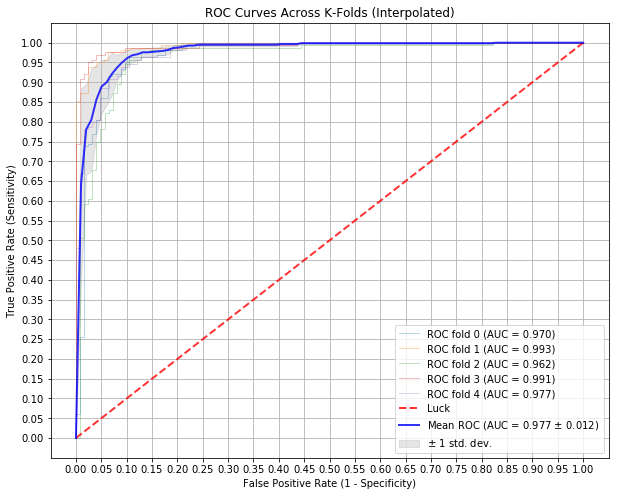

In [5]:
plot_cv_roc_curves(lr_rocs)

In [6]:
rf_rocs = test_model(ScikitModel(ensemble.RandomForestClassifier(), 
                       params={
                           'n_estimators': randint(10, 500),
                           'max_features': randint(3, 15),
                           'min_samples_split': randint(2, 50),
                           'min_samples_leaf': randint(1, 50)
                       },
                       random_search=True,
                       n_iter=250,
                       scoring='roc_auc',
                       verbose=True),
           x, y,
           allow_indeterminates=True)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 13.5min finished


Best params:  {'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 331}
Best score:  0.983115491829
Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 14.5min finished


Best params:  {'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 40, 'n_estimators': 308}
Best score:  0.978552485255
Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 15.3min finished


Best params:  {'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 474}
Best score:  0.981677689486
Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 14.5min finished


Best params:  {'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 17, 'n_estimators': 460}
Best score:  0.979160962824
Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 12.3min finished


Best params:  {'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 18, 'n_estimators': 411}
Best score:  0.982210056831
CV Confusion:  [(110, 7, 5, 143, 8, 16), (119, 8, 6, 160, 0, 0), (103, 7, 5, 150, 14, 9), (121, 8, 6, 161, 0, 0), (103, 7, 5, 146, 14, 13)]
Best CV scores:  [ 0.9831  0.9786  0.9817  0.9792  0.9822]
Avg best scores:  0.980943337245
FC Classified as FC: 556, (93.760539629 %)
FC Classified as KD: 37, (6.23946037099 %)
KD Classified as FC: 27, (3.43074968234 %)
KD Classified as KD: 760, (96.5692503177 %)
FC left indeterminate: 36
KD left indeterminate: 38


## Sklearn Ensemble Model

In [7]:
# Grid search params
clf1 = svm.SVC(probability=True)
clf2 = linear_model.LogisticRegression()

eclf = ensemble.VotingClassifier(
    estimators=[('svm', clf1), ('lr', clf2)],
    voting='soft')

params = {
    'svm__C': np.logspace(-3, 2, 100),
    'svm__gamma': np.logspace(-3, 2, 100),
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'lr__C': np.logspace(-3, 2, 100)
}

# Test model! 5-fold CV with hyperparameter optimization
clf = ScikitModel(
    eclf,
    params,
    random_search=True, 
    n_iter=100, 
    verbose=True)

ensemble_rocs = test_model(clf, x, y, allow_indeterminates=True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.0min finished


Best params:  {'svm__kernel': 'linear', 'svm__gamma': 0.26560877829466867, 'svm__C': 0.073907220335257789, 'lr__C': 0.01291549665014884}
Best score:  0.983651142356
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.1min finished


Best params:  {'svm__kernel': 'linear', 'svm__gamma': 0.0022570197196339192, 'svm__C': 1.7073526474706904, 'lr__C': 0.0064280731172843188}
Best score:  0.978492460873
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.8min finished


Best params:  {'svm__kernel': 'rbf', 'svm__gamma': 0.95454845666183374, 'svm__C': 3.8535285937105273, 'lr__C': 0.67341506577508214}
Best score:  0.984135078543
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.9min finished


Best params:  {'svm__kernel': 'rbf', 'svm__gamma': 0.036783797718286326, 'svm__C': 0.75646332755462908, 'lr__C': 0.84975343590864383}
Best score:  0.978718500576
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.0min finished


Best params:  {'svm__kernel': 'linear', 'svm__gamma': 0.0028480358684358021, 'svm__C': 0.0015922827933410922, 'lr__C': 6.1359072734131699}
Best score:  0.982044176668
CV Confusion:  [(108, 7, 5, 142, 10, 17), (116, 8, 6, 156, 1, 2), (108, 6, 5, 124, 10, 35), (120, 8, 6, 160, 0, 0), (100, 7, 5, 145, 17, 14)]
Best CV scores:  [ 0.9837  0.9785  0.9841  0.9787  0.982 ]
Avg best scores:  0.981408271803
FC Classified as FC: 552, (93.8775510204 %)
FC Classified as KD: 36, (6.12244897959 %)
KD Classified as FC: 27, (3.58090185676 %)
KD Classified as KD: 727, (96.4190981432 %)
FC left indeterminate: 38
KD left indeterminate: 68


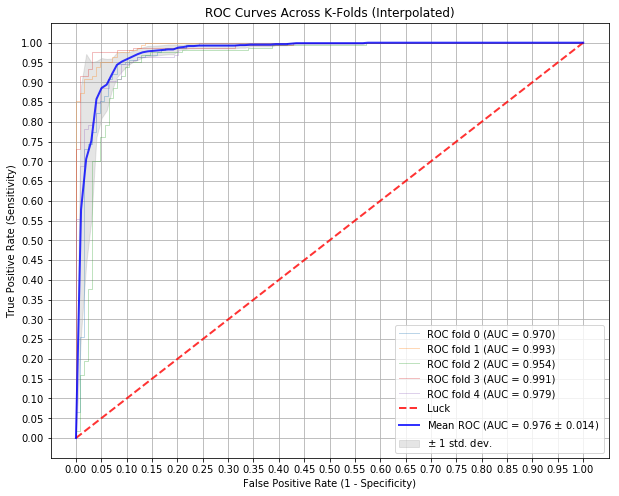

In [8]:
plot_cv_roc_curves(ensemble_rocs)